## Modeling with Random Forest
(Shristi Pandey)

In [3]:
import pandas as pd 
import datetime
import numpy as np 
import scipy as sp
from scipy.stats import mode
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

In [4]:
data_b4_impute = pd.read_csv("../data/Per_Patient/pat_merge_b4_impute.csv")
data_model_50pc = pd.read_csv("../data/Imputed/data_modeled_upto_50pct_missing.csv")
data_model_30pc = pd.read_csv("../data/Imputed/data_modeled_upto_30pct_missing.csv")
data_model_100pc = pd.read_csv("../data/Imputed/data_modeled_upto_100pct_missing.csv")
data_mean_30pc = pd.read_csv("../data/Imputed/data_mean_upto_30pct_missing.csv")
data_mean_50pc = pd.read_csv("../data/Imputed/data_mean_upto_50pct_missing.csv")

In [12]:
print(len(data_model_100pc.columns))
len(data_b4_impute.columns)


224


178

In [45]:
data_mean_50pc.describe()

,RID,AGE,PTEDUCAT,APOE4,FDG,AV45,ABETA,TAU,PTAU,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,TRABSCOR,FAQ,MOCA,EcogPtMem,EcogPtLang,EcogPtVisspat,EcogPtPlan,EcogPtOrgan,EcogPtDivatt,EcogPtTotal,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,mPACCdigit,mPACCtrailsB,Month,APGEN1,APGEN2,BCVOMIT,BCENERGY,...,HMT40,HMT15,RCT6,RCT392,HMT13,HMT19,RCT20,RCT8,RCT12,HMT9,RCT29,HMT18,RCT11,BAT126,HMT102,RCT14,MH9ENDO,MH7DERM,MH15DRUG,MH4CARD,MH18SURG,MH16SMOK,MH11HEMA,MH13ALLE,MH12RENA,MH3HEAD,MH17MALI,MH10GAST,MHPSYCH,MH6HEPAT,MH5RESP,MH14ALCH,MH2NEURL,MH8MUSCL,HMSCORE,MMSCORE,NXVISUAL,NXAUDITO,NXMOTOR,NXCONSCI,NXFINGER,NXABNORM,NXNERVE,NXTREMOR,NXGAIT,NXOTHER,NXPLANTA,NXSENSOR,NXTENDON,NXHEEL
count,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.0,2065.000000,2065.000000,2065.000000,2065.000000,...,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.00000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000
mean,3184.250363,0.512990,0.752603,0.474576,0.536265,0.319630,0.518807,0.169792,0.175688,0.145956,0.254211,0.299899,0.500679,0.783051,0.514344,0.621096,0.749577,0.910976,0.336693,0.387486,0.127323,0.759982,0.334067,0.224522,0.113264,0.120317,0.157714,0.248965,0.220020,0.309481,0.175611,0.131741,0.162294,0.188315,0.247378,0.207109,0.241021,0.467491,0.430901,0.488354,0.394462,0.438367,0.426257,0.603510,0.591558,0.0,3.001937,3.389346,1.009685,1.173850,...,0.359411,0.535965,0.295411,0.257332,0.320509,0.188639,0.270699,0.373022,0.348177,0.133654,0.104543,0.077540,0.127020,0.071207,0.481622,0.037438,0.360775,0.261017,0.006295,0.728814,0.784504,0.333172,0.073608,0.353511,0.360775,0.685714,0.198063,0.376271,0.285714,0.030993,0.179661,0.036804,0.243584,0.718160,0.100161,0.782744,1.050847,1.093947,1.032930,1.001453,1.02615,1.000969,1.046005,1.111864,1.102663,1.047458,1.019855,1.132688,1.133172,1.016465
std,2219.977926,0.194470,0.174440,0.644339,0.124683,0.134817,0.237267,0.084695,0.101588,0.176336,0.149086,0.165281,0.293897,0.218411,0.180730,0.139059,0.063423,0.073210,0.237972,0.244101,0.201257,0.130931,0.195748,0.169904,0.140091,0.144709,0.163598,0.198715,0.153049,0.247174,0.190226,0.181918,0.202654,0.224112,0.243581,0.194971,0.143820,0.133440,0.124693,0.146943,0.116968,0.120736,0.151339,0.211086,0.194493,0.0,0.404668,0.492662,0.097960,0.379072,...,0.088243,0.129019,0.107760,0.105834,0.119489,0.098523,0.089468,0.133733,0.096200,0.053720,0.131333,0.049675,0.055458,0.061996,0.153088,0.032463,0.480342,0.439296,0.079113,0.444680,0.411266,0.471462,0.261195,0.478175,0.480342,0.464343,0.398636,0.484567,0.451863,0.173340,0.383998,0.188326,0.429348,0.450005,0.117805,0.218489,0.219739,0.291825,0.178496,0.038097,0.15962,0.031114,0.209546,0.315276,0.303592,0.212667,0.139535,0.339319,0.339843,0.127286
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

Lets first use the imputed dataset to generate a tree based model. 

In [47]:
#prepare data: 
to_drop = ['DX_BASE_2.0', 'DX_BASE_3.0',  'DX_bl_CN', 
           'DX_bl_MCI', 'DX_FINAL_2.0', 'DX_FINAL_3.0', 'DXCOMB_2.0', 'DXCOMB_3.0']


def prepare_data (data, to_drop):
    #separate train and test sets:
    train, test = train_test_split(data, test_size=.2, stratify=data[['DX_FINAL_2.0', 'DX_FINAL_3.0']],
                                  random_state= 42)

    #separate out the response variables: 
    X_train =  train.drop(to_drop, axis=1)
    y_train = train[['DX_FINAL_2.0', 'DX_FINAL_3.0']]
    X_test = test.drop(to_drop, axis=1)
    y_test = test[['DX_FINAL_2.0', 'DX_FINAL_3.0']]
    return X_train, y_train, X_test, y_test
    

In [48]:
X_train_30pc, y_train_30pc, X_test_30pc, y_test_30pc = prepare_data(data_after_impute_30pc, to_drop)
X_train_50pc, y_train_50pc, X_test_50pc, y_test_50pc = prepare_data(data_after_impute_50pc, to_drop)
X_train_100pc, y_train_100pc, X_test_100pc, y_test_100pc = prepare_data(data_after_impute_100pc, to_drop)

In [10]:
X_train_100pc.shape[1]

187

Next we will use cross validation to choose the appropriate hyperparameters for our random forest model. There are three hyperparameters that need to be tuned. 
1. max_depth 
2. number_estimators
3. max_features 

In [57]:
# this is a function to do manual selection of hyperparameters by iterating through a range of parameters.
# alternatively this can be done with grid searchcv. 

def choose_hyper_parameters(X_train, y_train):
    best_score = 0
    k_fold=5
    best_max_depth = 0
    best_max_features = 0
    best_n_trees = 0
    
    max_depth =500 #maximum depth of the tree
    max_features = [5, 10, 20, 30, 40, 60, 70, 90, 125, X_train.shape[1]] #number of features considered at each split 
    n_trees = [5, 10, 20, 30, 50, 100, 500, 1000] #combine n_trees. 
    
    for t in n_trees:
        for f in max_features:
            for d in range(1, max_depth, 25):
                
                rf_model = RandomForestClassifier(n_estimators=t, max_features= f, max_depth= d, random_state=42)
                
                #cross validation score: 
                scores = cross_val_score(rf_model, X_train, y_train, cv=k_fold, scoring = 'accuracy')
                #compute mean 
                mean_score = np.mean(scores)
                
                #check if the core is better than current best score and if so store parameters:
                if mean_score>best_score:
                    best_score = mean_score
                    best_max_depth = d
                    best_max_features = f
                    best_n_trees = t
                    
                #print ('Best score: ', best_score, 'best_max_d: ', best_max_depth, 
                      'best_n_trees: ', best_n_trees, 'best_max_features: ', best_max_features)
                #print('curr score: ', mean_score, 'curr_max_d: ', d, 'curr_n_trees: ', t, 'curr_max_features: ', f)
                
    return best_max_depth, best_max_features, best_n_trees

In [11]:
# For each set we will need to choose its own set of hyperparameters. 
max_depth_30pc, max_features_30pc, num_trees_30pc = choose_hyper_parameters(X_train_30pc, y_train_30pc)
max_depth_50pc, max_features_50pc, num_trees_50pc = choose_hyper_parameters(X_train_50pc, y_train_50pc)
max_depth_100pc, max_features_100pc, num_trees_100pc = choose_hyper_parameters(X_train_100pc, y_train_100pc)

In [63]:
# use gridsearch CV and randomized CV to see if we get similar results with both hyperparamter search tools
def perform_parameter_search(X_train, y_train):
    param_grid = {"max_depth": [3, None],
                  "max_features": [5, 10, 20, 30, 40, 60, 70, 90, 125, X_train.shape[1]],
                  "min_samples_split": [3, 5, 7, 10, 20, 30, 100],
                  "bootstrap": [True],
                  "criterion": ["gini", "entropy"]}

    # run grid search
    rf = RandomForestClassifier(n_estimators=20)

    grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
    #start = time()
    grid_search.fit(X_train, y_train)
    return grid_search

In [ ]:
grid_search_30pc_model = perform_parameter_search(X_train_30pc, y_train_30pc)
grid_search_50pc_model = perform_parameter_search(X_train_50pc, y_train_50pc)
grid_search_100pc_model = perform_parameter_search(X_train_100pc, y_train_100pc)

In [65]:
##### Here are the chosen hyperparameters based on the searching the above mentioned parameters

max_depth_30pc, max_features_30pc, num_trees_30pc= 11, 40, 200
max_depth_50pc, max_features_50pc, num_trees_50pc = 11, 50, 200#11, 40, 200
max_depth_100pc, max_features_100pc, num_trees_100pc = 11, 70, 200

rf_model_30pc = RandomForestClassifier(n_estimators=num_trees_30pc, max_depth=max_depth_30pc, 
                                  max_features = max_features_30pc, random_state=42)
rf_model_30pc.fit(X_train_30pc, y_train_30pc)


rf_model_50pc = RandomForestClassifier(n_estimators=num_trees_50pc, max_depth=max_depth_50pc, 
                                  max_features = max_features_50pc, random_state=42)
rf_model_50pc.fit(X_train_50pc, y_train_50pc)

rf_model_100pc = RandomForestClassifier(n_estimators=num_trees_100pc, max_depth=max_depth_100pc, 
                                  max_features = max_features_100pc, random_state=42)
rf_model_100pc.fit(X_train_100pc, y_train_100pc)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features=70, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [66]:
train_score_30pc = accuracy_score(rf_model_30pc.predict(X_train_30pc), y_train_30pc)
test_score_30pc = accuracy_score(rf_model_30pc.predict(X_test_30pc), y_test_30pc)


train_score_50pc = accuracy_score(rf_model_50pc.predict(X_train_50pc), y_train_50pc)
test_score_50pc = accuracy_score(rf_model_50pc.predict(X_test_50pc), y_test_50pc)


train_score_100pc = accuracy_score(rf_model_100pc.predict(X_train_100pc), y_train_100pc)
test_score_100pc = accuracy_score(rf_model_100pc.predict(X_test_100pc), y_test_100pc)


In [67]:
print(train_score_30pc, test_score_30pc)
print(train_score_50pc, test_score_50pc)
print(train_score_100pc, test_score_100pc)

0.9824455205811138 0.7796610169491526
0.9842615012106537 0.7966101694915254
0.9854721549636803 0.7796610169491526


In [222]:
# This function returns a % imputed for each of the new features added in the imputed data by 
# getting this info from the base columns

def order_by_num_imputed(orig_data):
    total_patients = orig_data.shape[0]
    #compute the sum of nas in each column in original data: 
    columns = list(orig_data.columns)
    relevant_data = orig_data[columns]
    num_na = pd.DataFrame((relevant_data.isna().sum()/total_patients)*100)
    num_na = num_na.rename(columns={0:'num_na'})
    num_na = num_na.to_dict()
    num_na = num_na['num_na'] 
    return num_na



In [325]:
num_na = order_by_num_imputed(data_b4_impute)

In this base model, we can order the features by feature importance that is spit out by random forest. We will also combine this with how many of these top features were missing in the original data to get a sense of how many of our very important features in the data come from mostly imputed data. We will start by looking at the top 40 features of each model 

In [314]:
def find_important_features(x_train, model):
    features = list(x_train.columns)
    importances = list(model.feature_importances_)
    feature_importance = pd.DataFrame({'Names': features, 'Feature_Importance': importances})
    result = feature_importance.sort_values(['Feature_Importance'], ascending= False)
    return result

def correlate_feature_importance_and_missingness(model, missing_dict, x_train):
    
    top_features = find_important_features(x_train, model)
    top_features = top_features.head(20)
    
    baseline_cols = pd.read_csv("BaselineNames.csv")
    baseline_cols.head()
    baseline_cols = baseline_cols.drop('Unnamed: 0', axis = 1)
    baseline_cols = baseline_cols.set_index('New Col')
    baseline_cols = baseline_cols.to_dict()
    baseline_cols = baseline_cols['Base col ']
    
    nans = []
    for i in range(top_features.shape[0]):
        column_name = top_features.iloc[i, 1]
        base_column = baseline_cols[column_name]
        percent_na = num_na[base_column]
        nans.append(percent_na)
    top_features['percent_na'] = nans
    return top_features

In [315]:
find_important_features(X_train_100pc, rf_model_100pc)

,Feature_Importance,Names
44,0.127567,mPACCtrailsB
8,0.126507,CDRSB
43,0.070549,mPACCdigit
17,0.057423,LDELTOTAL
0,0.047498,RID
4,0.046246,AV45
20,0.034174,FAQ
3,0.026932,FDG
10,0.022497,ADAS13
13,0.013881,RAVLT_immediate


Now lets take our most important features and ask which ones have the most missing values. 

In [316]:
top_features_30pc = correlate_feature_importance_and_missingness(rf_model_30pc, missing_dict=num_na, x_train = X_train_30pc)
top_features_50pc = correlate_feature_importance_and_missingness(rf_model_50pc, missing_dict=num_na, x_train = X_train_50pc)
top_features_100pc = correlate_feature_importance_and_missingness(rf_model_100pc, missing_dict=num_na, x_train = X_train_100pc)

In [317]:
top_features_50pc.head()

,Feature_Importance,Names,percent_na
43,0.129998,mPACCtrailsB,0.096852
8,0.122935,CDRSB,0.000000
42,0.062572,mPACCdigit,0.096852
17,0.056198,LDELTOTAL,0.145278
0,0.051817,RID,0.000000


In [321]:
top_features_30pc.head(20)

,Feature_Importance,Names,percent_na
3,0.132868,CDRSB,0.000000
23,0.116929,mPACCtrailsB,0.096852
12,0.074955,LDELTOTAL,0.145278
22,0.068497,mPACCdigit,0.096852
0,0.063106,RID,0.000000
14,0.049988,FAQ,0.629540
5,0.029734,ADAS13,0.387409
16,0.017198,Hippocampus,19.273608
6,0.016192,ADASQ4,0.145278
18,0.015210,Entorhinal,21.549637


In [320]:
top_features_100pc.head(20)

,Feature_Importance,Names,percent_na
44,0.127567,mPACCtrailsB,0.096852
8,0.126507,CDRSB,0.000000
43,0.070549,mPACCdigit,0.096852
17,0.057423,LDELTOTAL,0.145278
0,0.047498,RID,0.000000
4,0.046246,AV45,46.295400
20,0.034174,FAQ,0.629540
3,0.026932,FDG,31.138015
10,0.022497,ADAS13,0.387409
13,0.013881,RAVLT_immediate,0.145278


Text(0,0.5,'percent missing')

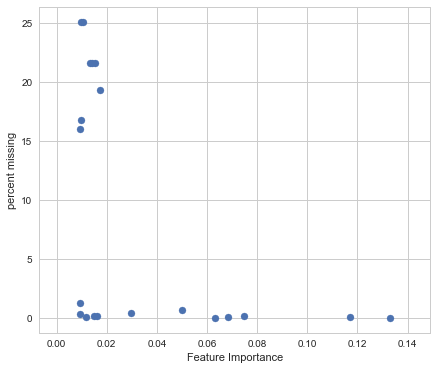

In [322]:
plt.figure(figsize= (7,6))
plt.scatter(x=top_features_30pc["Feature_Importance"], y=top_features_30pc["percent_na"])
plt.xlabel('Feature Importance')
plt.ylabel('percent missing')

Text(0,0.5,'percent missing')

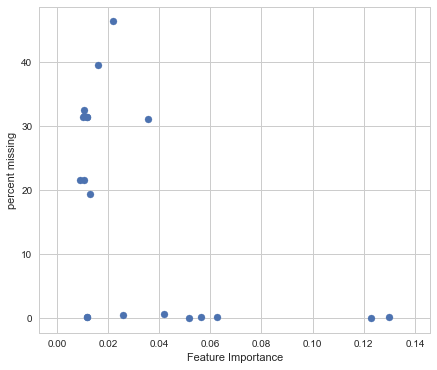

In [323]:
plt.figure(figsize= (7,6))
plt.scatter(x=top_features_50pc["Feature_Importance"], y=top_features_50pc["percent_na"])
plt.xlabel('Feature Importance')
plt.ylabel('percent missing')

Text(0,0.5,'percent missing')

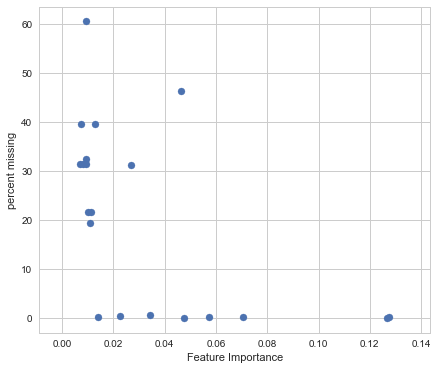

In [324]:
plt.figure(figsize= (7,6))
plt.scatter(x=top_features_100pc["Feature_Importance"], y=top_features_100pc["percent_na"])
plt.xlabel('Feature Importance')
plt.ylabel('percent missing')

In [ ]:
pd.read_cs